In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing data for EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df_train = pd.read_csv("/content/drive/MyDrive/Week-4/rossmann-store-sales/train.csv")
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train.set_index("Date", inplace =True)

print(df_train.shape)
df_train.head()

<ipython-input-30-9d4bc515777d>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("/content/drive/MyDrive/Week-4/rossmann-store-sales/train.csv")


(1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


Insuring state holiday values all are in the same datype format


In [31]:
df_train['StateHoliday'] = df_train['StateHoliday'].astype(str)


Checking for info of the data


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


checking for weekly sales

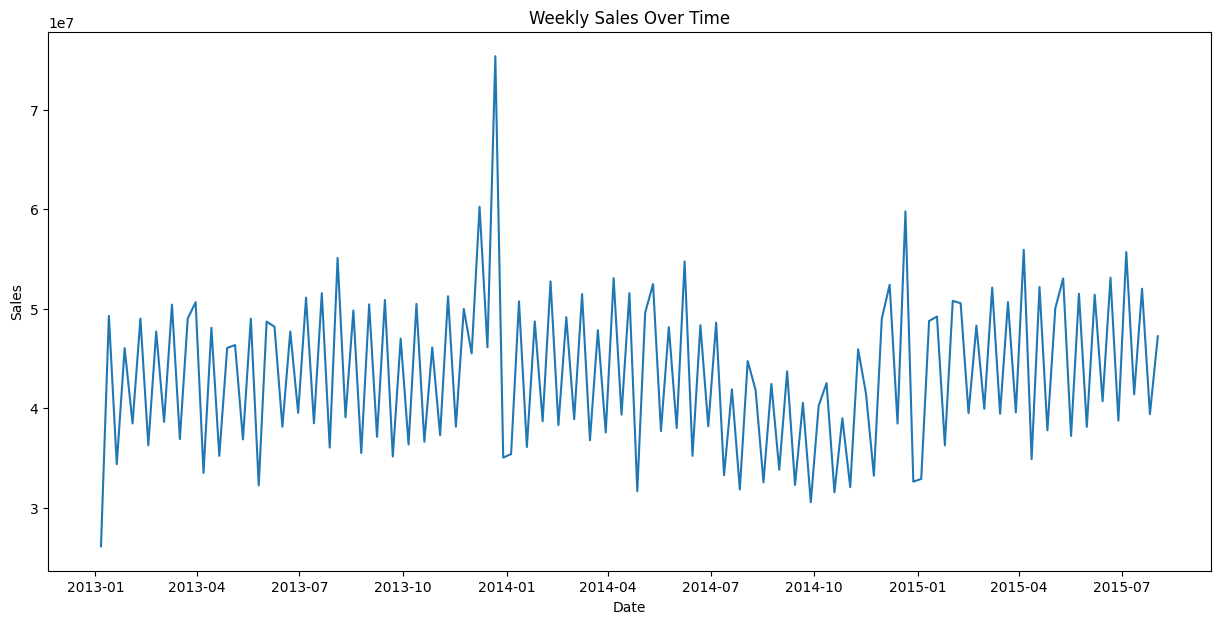

In [34]:
# Create a temporary variable for weekly sales with out modifying df
weekly_sales = df_train['Sales'].resample('W').sum()

# Time series plot of weekly
plt.figure(figsize = (15,7))
plt.plot(weekly_sales.index, weekly_sales)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()



**setting date column as index of the data and resample the data monthly **

In [27]:

df_train = df_train.set_index('Date')
# Resample numerical features using sum
monthly_numerical = df_train.select_dtypes(include='number').resample('M').sum()

<ipython-input-27-51e02c928567>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_numerical = df_train.select_dtypes(include='number').resample('M').sum()


plott of sales for each month

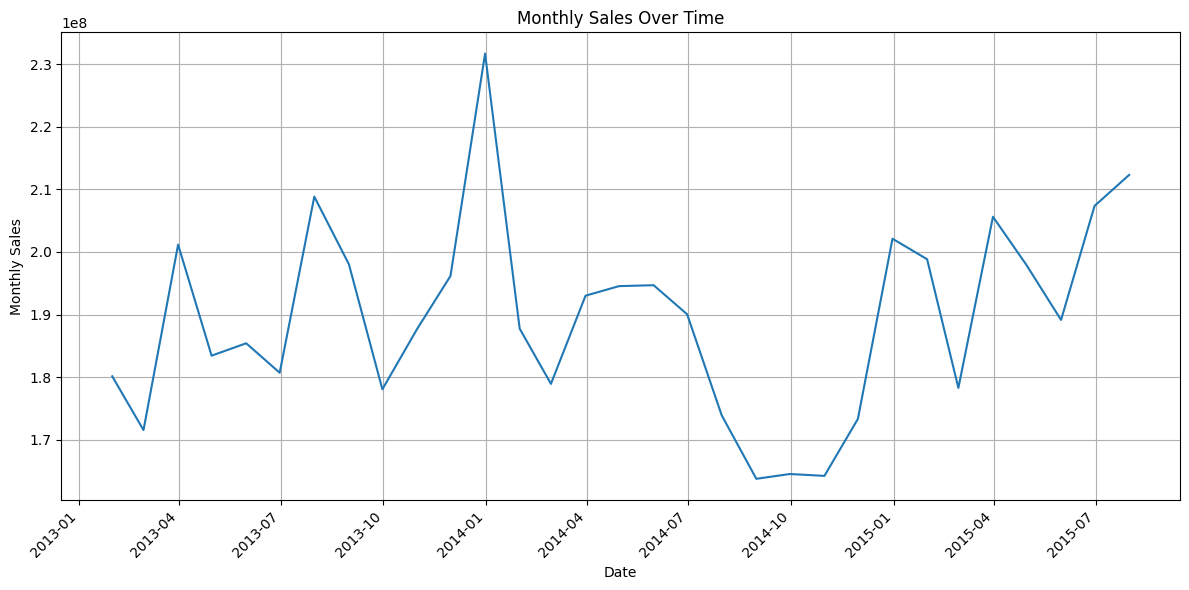

In [28]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(monthly_numerical.index, monthly_numerical['Sales'])
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.grid(True)  # Add a grid for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

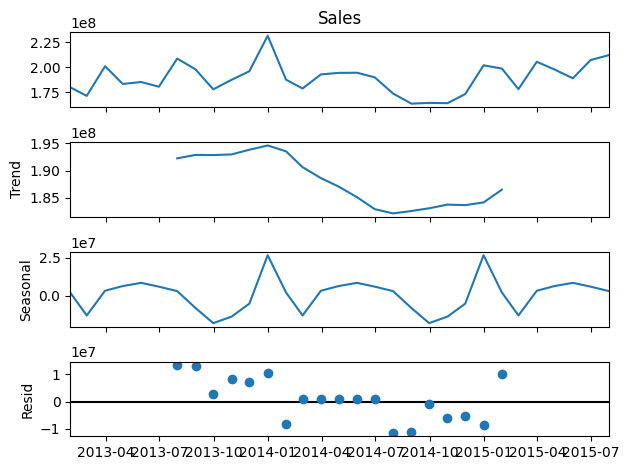

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
# seasonal Decomposition
result = seasonal_decompose(monthly_numerical['Sales'], model= 'additive')
result.plot()
plt.tight_layout()
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

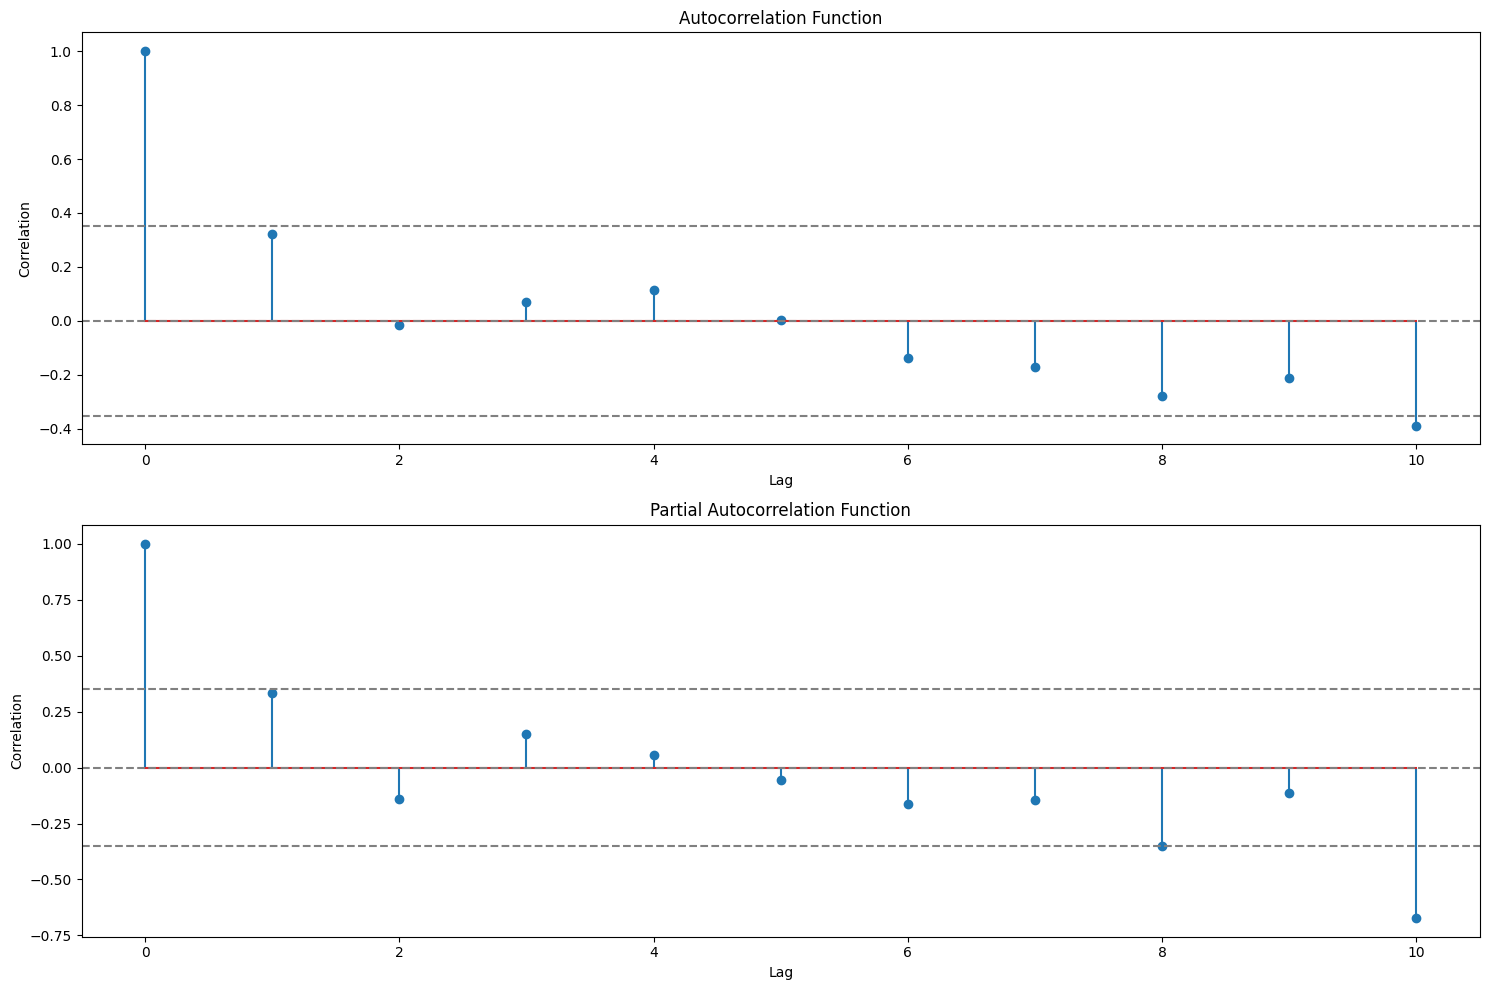

In [44]:
from statsmodels.tsa.stattools import acf, pacf
def plotting_PACF_ACF(monthly_numerical):
  # Determine number of lags (use 1/3 of  data lenght)
  n_lags = len(monthly_numerical) // 3

  # calculate ACF and PACF
  acf_values = acf(monthly_numerical['Sales'].dropna(), nlags= n_lags)
  pacf_values = pacf(monthly_numerical['Sales'].dropna(), nlags =n_lags)

  # plot ACH ans PACF using stem plots
  fig, (ax1, ax2)= plt.subplots(2,1, figsize =(15,10))

  # plot ACF
  ax1.stem(range(len(acf_values)), acf_values)
  ax1.axhline(y=0, linestyle='--', color='gray')
  ax1.axhline(y=-1.96/np.sqrt(len(monthly_numerical)), linestyle='--', color='gray')
  ax1.axhline(y=1.96/np.sqrt(len(monthly_numerical)), linestyle='--', color='gray')
  ax1.set_title('Autocorrelation Function')
  ax1.set_xlabel('Lag')
  ax1.set_ylabel('Correlation')


  # Plot PACF
  ax2.stem(range(len(pacf_values)), pacf_values)
  ax2.axhline(y=0, linestyle='--', color='gray')
  ax2.axhline(y=-1.96/np.sqrt(len(monthly_numerical)), linestyle='--', color='gray')
  ax2.axhline(y=1.96/np.sqrt(len(monthly_numerical)), linestyle='--', color='gray')
  ax2.set_title('Partial Autocorrelation Function')
  ax2.set_xlabel('Lag')
  ax2.set_ylabel('Correlation')

  plt.tight_layout()
  return plt


plotting_PACF_ACF(monthly_numerical)




Here's how we can interpret the plots:

Autocorrelation Function (ACF) Plot

Purpose: The ACF plot shows the correlation of the time series with its own lagged values. Each bar in the plot represents the correlation at a specific lag.

Interpretation:

Significant lags: Bars that extend beyond the horizontal dashed lines (confidence intervals) indicate statistically significant correlations.
Gradual decline: A gradual decline in the bars suggests an autoregressive (AR) process, meaning past values influence current values.
Sharp drop: A sharp drop after a few lags might indicate a moving average (MA) process, meaning the current value is influenced by past forecast errors.
Seasonality: Regular spikes or patterns at fixed intervals might indicate seasonality in the data.
Partial Autocorrelation Function (PACF) Plot

Purpose: The PACF plot shows the correlation between the time series and its lagged values, after controlling for the correlations at shorter lags. This helps isolate the direct relationship between observations at different lags.

Interpretation:

Significant lags: Bars that extend beyond the horizontal dashed lines (confidence intervals) indicate statistically significant partial correlations.
Sharp drop: A sharp drop after a few lags suggests an AR process.
Gradual decline: A gradual decline might indicate an MA process.
Seasonality: Regular spikes or patterns at fixed intervals might indicate seasonality.

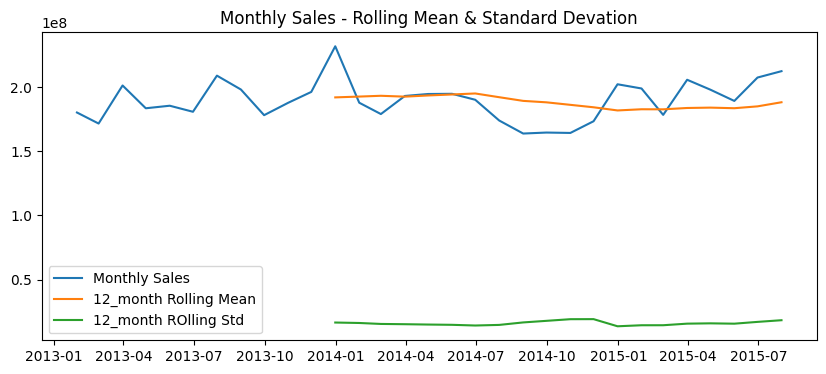

In [49]:
# Rolling Statistics
rolling_mean = monthly_numerical.rolling(window=12).mean()
rolling_std = monthly_numerical.rolling(window= 12).std()

plt.figure(figsize=(10, 4))
plt.plot(monthly_numerical.index, monthly_numerical['Sales'], label='Monthly Sales')
plt.plot(rolling_mean.index, rolling_mean["Sales"], label='12_month Rolling Mean')
plt.plot(rolling_std.index, rolling_std['Sales'], label = '12_month ROlling Std')
plt.legend()
plt.title('Monthly Sales - Rolling Mean & Standard Devation')
plt.show()

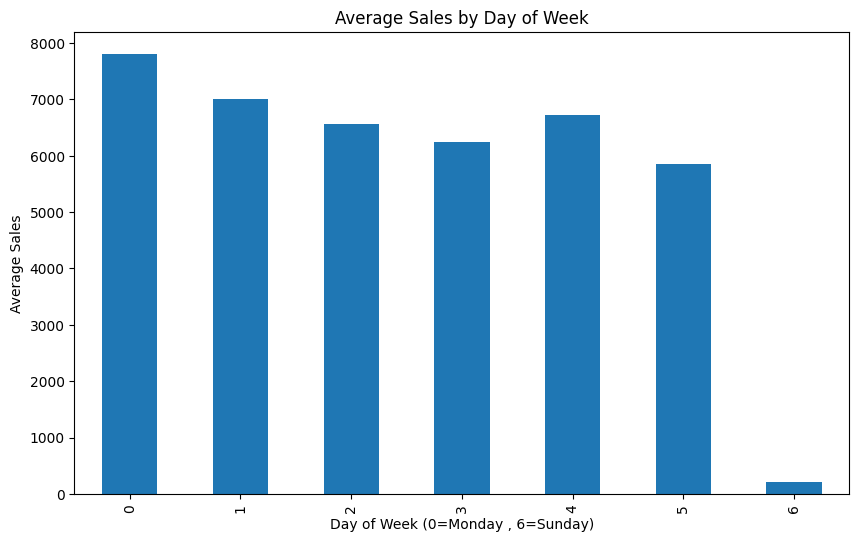

In [51]:
# Day of weeks patterns
df_train['DayOfWeek'] = df_train.index.dayofweek
day_of_week_sales = df_train.groupby('DayOfWeek')['Sales'].mean()
day_of_week_sales.plot(kind = 'bar', figsize=(10, 6))
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week (0=Monday , 6=Sunday)')
plt.ylabel('Average Sales')
plt.show()


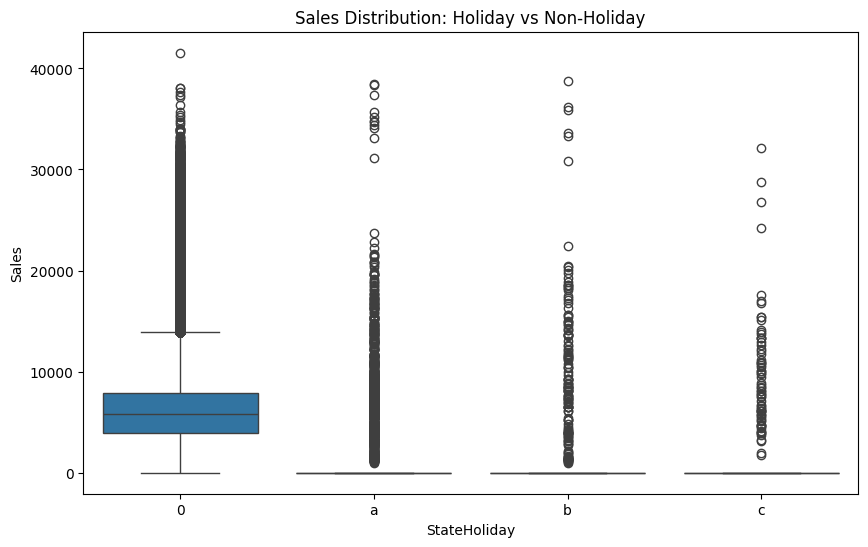

In [55]:

# Visualize sales distribution for holiday vs non-holiday
plt.figure(figsize=(10, 6))
sns.boxplot(x='StateHoliday', y='Sales', data=df_train)
plt.title('Sales Distribution: Holiday vs Non-Holiday')
plt.xticks([0, 1, 2, 3], ['0', 'a', 'b', 'c'])
plt.show()

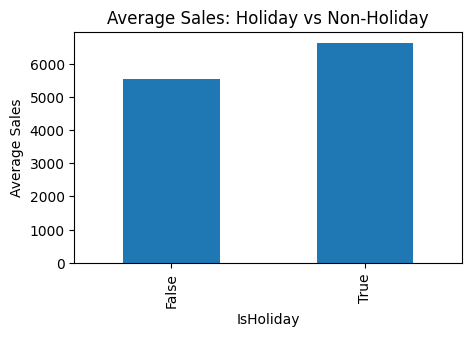

In [57]:
# Checking for holidays effect
df_train['IsHoliday'] = df_train['SchoolHoliday'] | (df_train.index.month == 12)  # Assuming December is a holiday month
holiday_effect = df_train.groupby('IsHoliday')['Sales'].mean()
holiday_effect.plot(kind='bar', figsize=(5, 3))
plt.title('Average Sales: Holiday vs Non-Holiday')
plt.ylabel('Average Sales')
plt.show()


Monthly Average Sales: Promo vs No Promo
            No Promo         Promo
Date                              
2013-01  4141.538268   7458.495964
2013-02  4332.866966   7585.079372
2013-03  4115.927186   7638.399283
2013-04  4056.571500   7624.517339
2013-05  4107.351370   7104.278786
2013-06  4369.417489   7467.653901
2013-07  4327.757848   8415.714522
2013-08  4411.156007   7817.069283
2013-09  4160.383901   7648.197489
2013-10  4418.701473   7551.429148
2013-11  4865.246099   7863.312646
2013-12  4866.478710  10561.610942
2014-01  4307.226778   7793.638744
2014-02  4480.128351   7982.825202
2014-03  4229.028251   8048.310151
2014-04  4305.122720   8082.299253
2014-05  4529.243993   7379.762556
2014-06  4104.911494   8404.769751
2014-07  4495.055199   8082.347018
2014-08  4402.661765   7916.256684
2014-09  4350.933214   8136.360250
2014-10  4580.032977   7168.609050
2014-11  3999.292193   8359.207130
2014-12  5338.495238  10406.335615
2015-01  3970.815415   7653.475815
2015-02  4620.

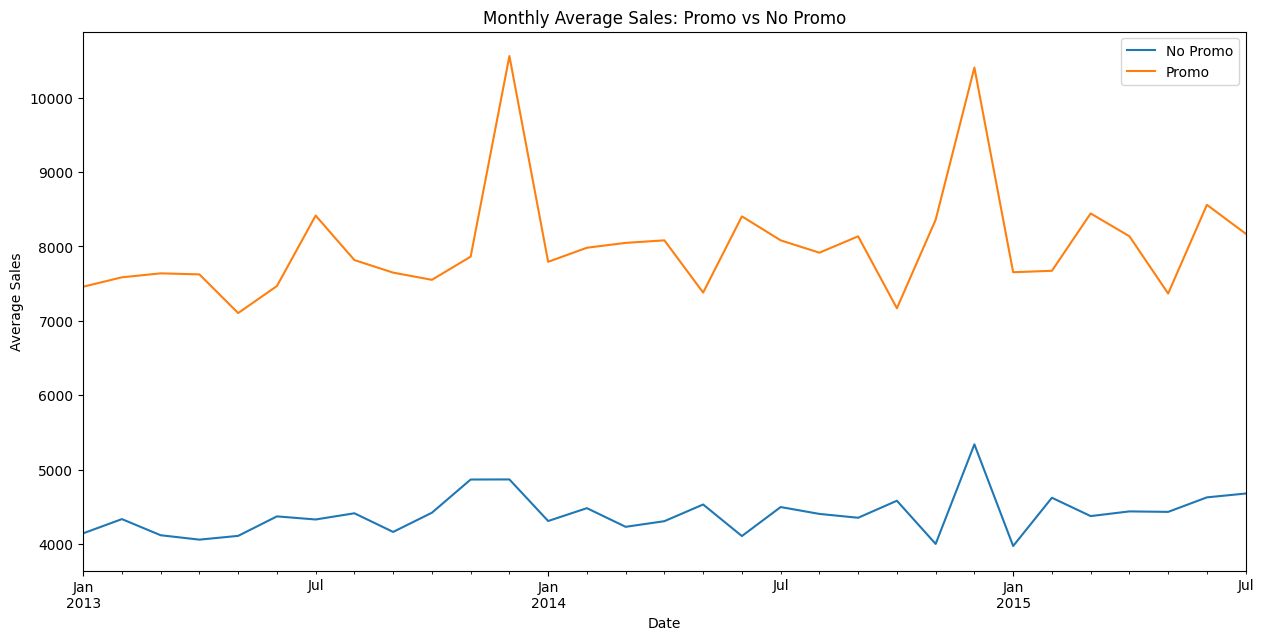

In [59]:
# 9. Promo effect over time
monthly_promo_sales = df_train.groupby([df_train.index.to_period('M'), 'Promo'])['Sales'].mean().unstack()

# Rename columns for clarity
monthly_promo_sales.columns = ['No Promo', 'Promo']

# Display the data
print("Monthly Average Sales: Promo vs No Promo")
print(monthly_promo_sales)

# Calculate the difference and percentage increase
monthly_promo_sales['Difference'] = monthly_promo_sales['Promo'] - monthly_promo_sales['No Promo']
monthly_promo_sales['Percentage Increase'] = (monthly_promo_sales['Difference'] / monthly_promo_sales['No Promo']) * 100

print("\nDifference and Percentage Increase:")
print(monthly_promo_sales[['Difference', 'Percentage Increase']])

# Plot
monthly_promo_sales[['No Promo', 'Promo']].plot(figsize=(15, 7))
plt.title('Monthly Average Sales: Promo vs No Promo')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend(['No Promo', 'Promo'])
plt.show()

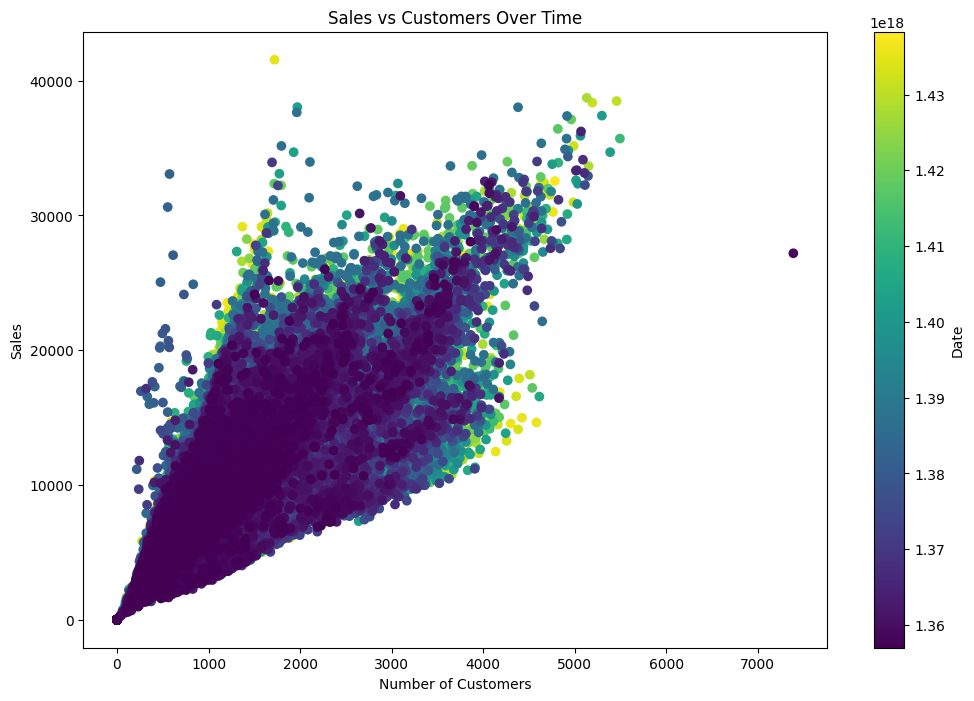

In [63]:
# Sales vs Customers scatter plot with time color gradient
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_train['Customers'], df_train['Sales'], c=df_train.index, cmap='viridis')
plt.colorbar(scatter, label='Date')
plt.title('Sales vs Customers Over Time')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

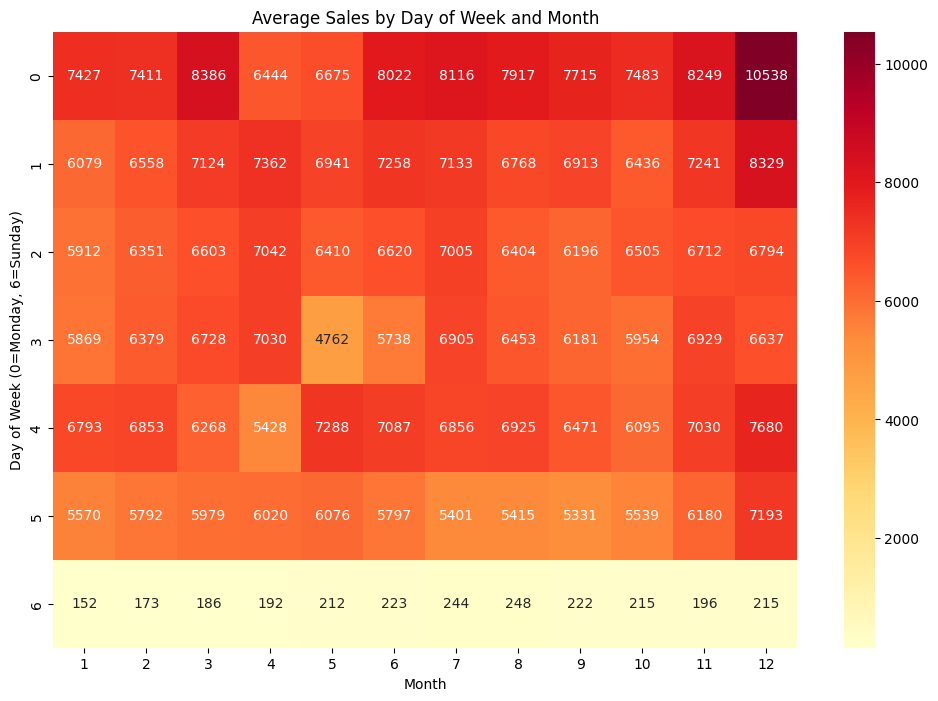

In [64]:
#  Heatmap of sales by day of week and month
df_train['DayOfWeek'] = df_train.index.dayofweek
df_train['Month'] = df_train.index.month
sales_heatmap = df_train.pivot_table(values='Sales', index='DayOfWeek', columns='Month', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(sales_heatmap, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Average Sales by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week (0=Monday, 6=Sunday)')
plt.show()

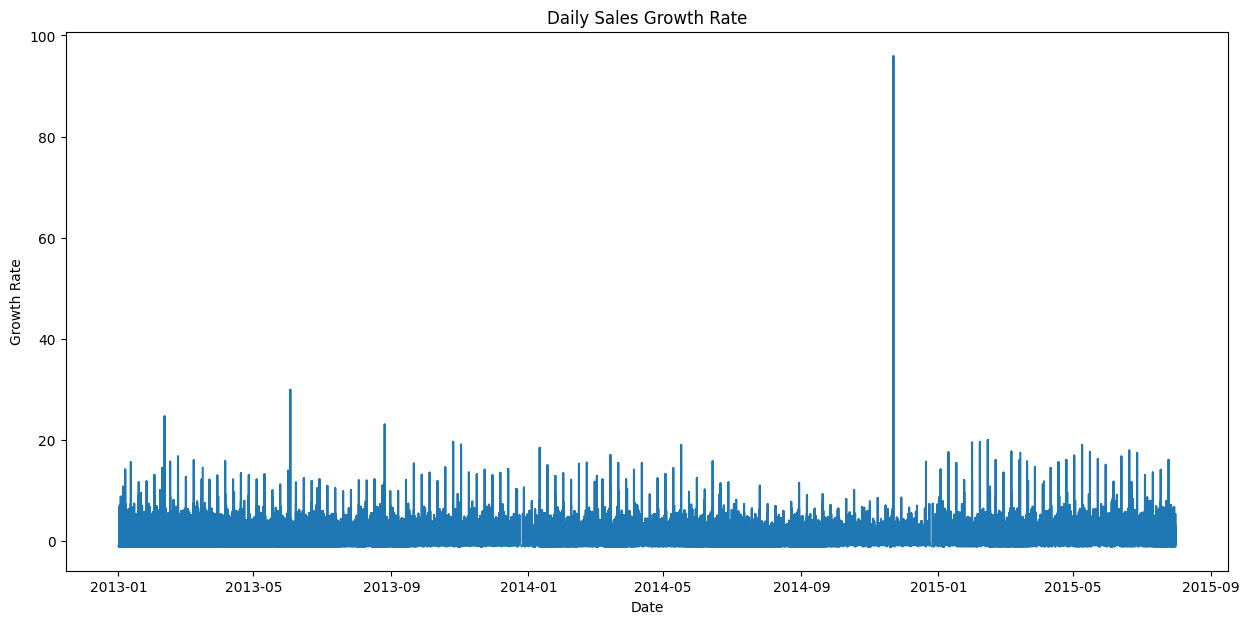

In [65]:
# Sales growth rate
df_train['SalesGrowthRate'] = df_train['Sales'].pct_change()
plt.figure(figsize=(15, 7))
plt.plot(df_train.index, df_train['SalesGrowthRate'])
plt.title('Daily Sales Growth Rate')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.show()

In [66]:
features_to_remove = ['MA30', 'SD30', 'SalesGrowthRate','IsHoliday','CumulativeSales']
df_cleaned = df_train.drop(columns=features_to_remove, errors='ignore')

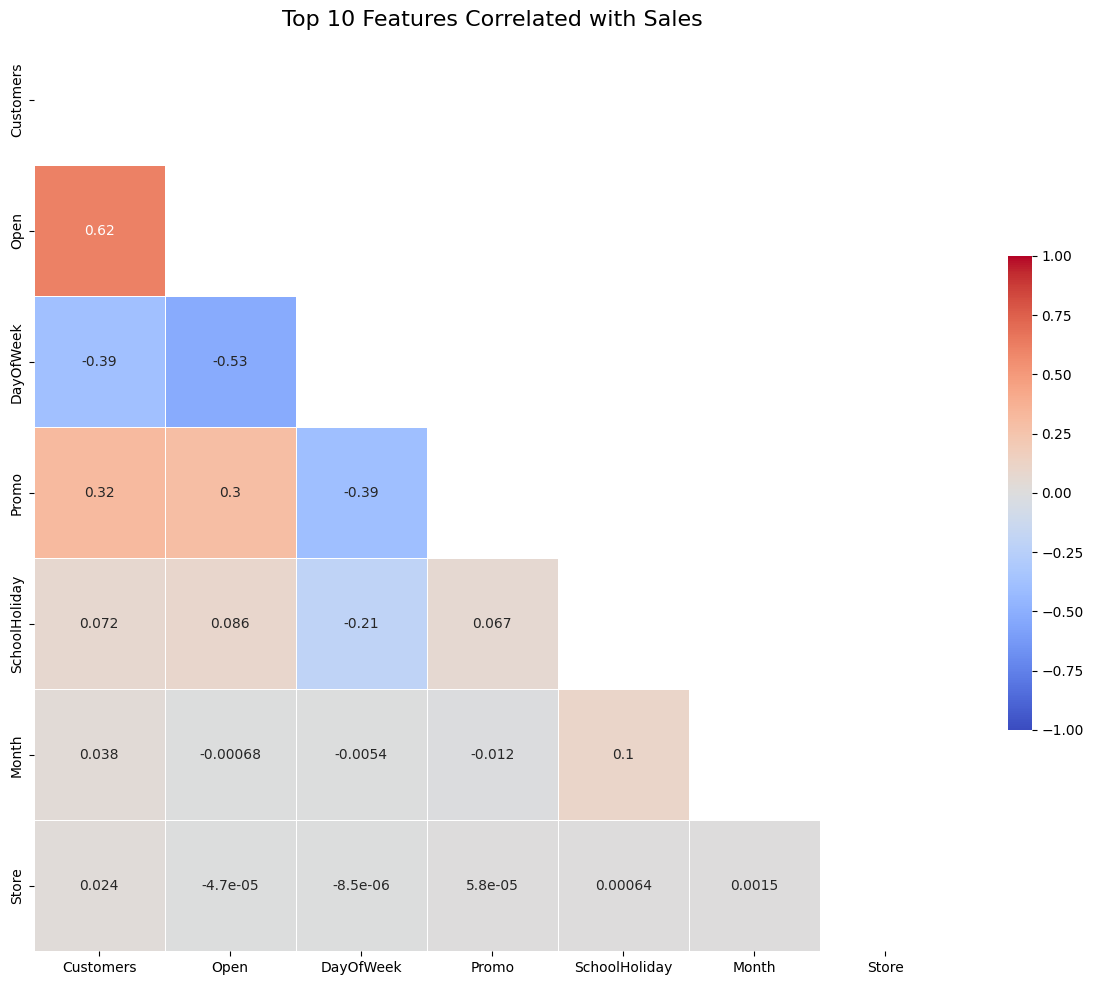

Correlations with Sales:
Customers        0.894711
Open             0.678472
DayOfWeek        0.462125
Promo            0.452345
SchoolHoliday    0.085124
Month            0.048768
Store            0.005126
Name: Sales, dtype: float64


In [68]:
# Assuming df is your DataFrame
# Select numeric columns for correlation analysis
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlations
correlations = df_cleaned[numeric_columns].corr()['Sales'].abs().sort_values(ascending=False)

# Select top 10 correlated features (excluding 'Sales' itself)
top_features = correlations[1:11].index.tolist()

# Create correlation matrix for these features
f_correlation = df_train[top_features].corr()

# Generate a mask for the upper triangle
f_mask = np.triu(np.ones_like(f_correlation, dtype=bool))

# Set up the matplotlib figure
f_fig, f_ax = plt.subplots(figsize=(12, 10))

# Create the heatmap
sns.heatmap(f_correlation, mask=f_mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Top 10 Features Correlated with Sales', fontsize=16)
plt.tight_layout()
plt.show()

# Print the correlation values
print("Correlations with Sales:")
print(correlations[top_features])
